In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt
print(gt.__version__)
from itertools import product
import random

0.5.9


('C', 4, 'C4', 1.0)

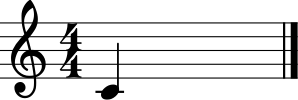

In [3]:
import guitarHarmony as gt
a=gt.Note()
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

('Fb', 5, 'Fb5', 2.5)

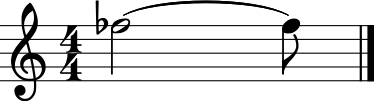

In [4]:
import guitarHarmony as gt
a=gt.Note('Fb5', 2.5)
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

Inv.P1


Inv.P1


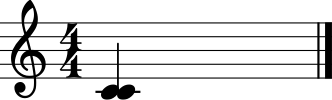

Inv.A1


Inv.A1


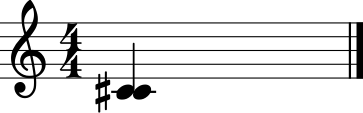

Inv.d2


Inv.d2


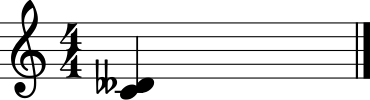

In [5]:
import guitarHarmony as gt
for intv in gt.Interval.displayAllIntervals()[:3]:
    gt.Interval(intv).show('midi')
    gt.Interval(intv).show()

[Note(C), Note(E), Note(G), Note(Bb)]

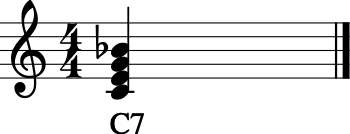

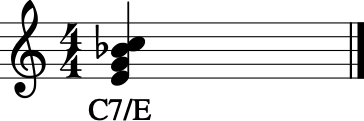

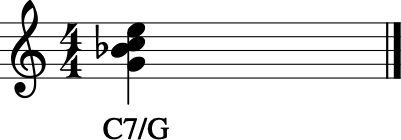

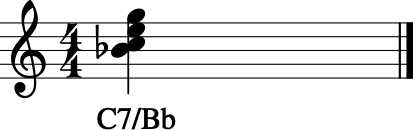

In [7]:
import guitarHarmony as gt
root='C'
chord_type='7'
chord = gt.Chord(root, chord_type)
chord.chord_notes
for i in range(4):
    chord.getInversion(i).show('notation')

root = 'CDEFGAB'
for t in gt.Chord.displayAllChordsRecipe()[:3]:
    mute=gt.Chord('C', chord_type=t).buildArpeggio()

D5
A
B.m
F#.m
G
D
G
A
D5
A
B.m
F#.m
G
D
G
A


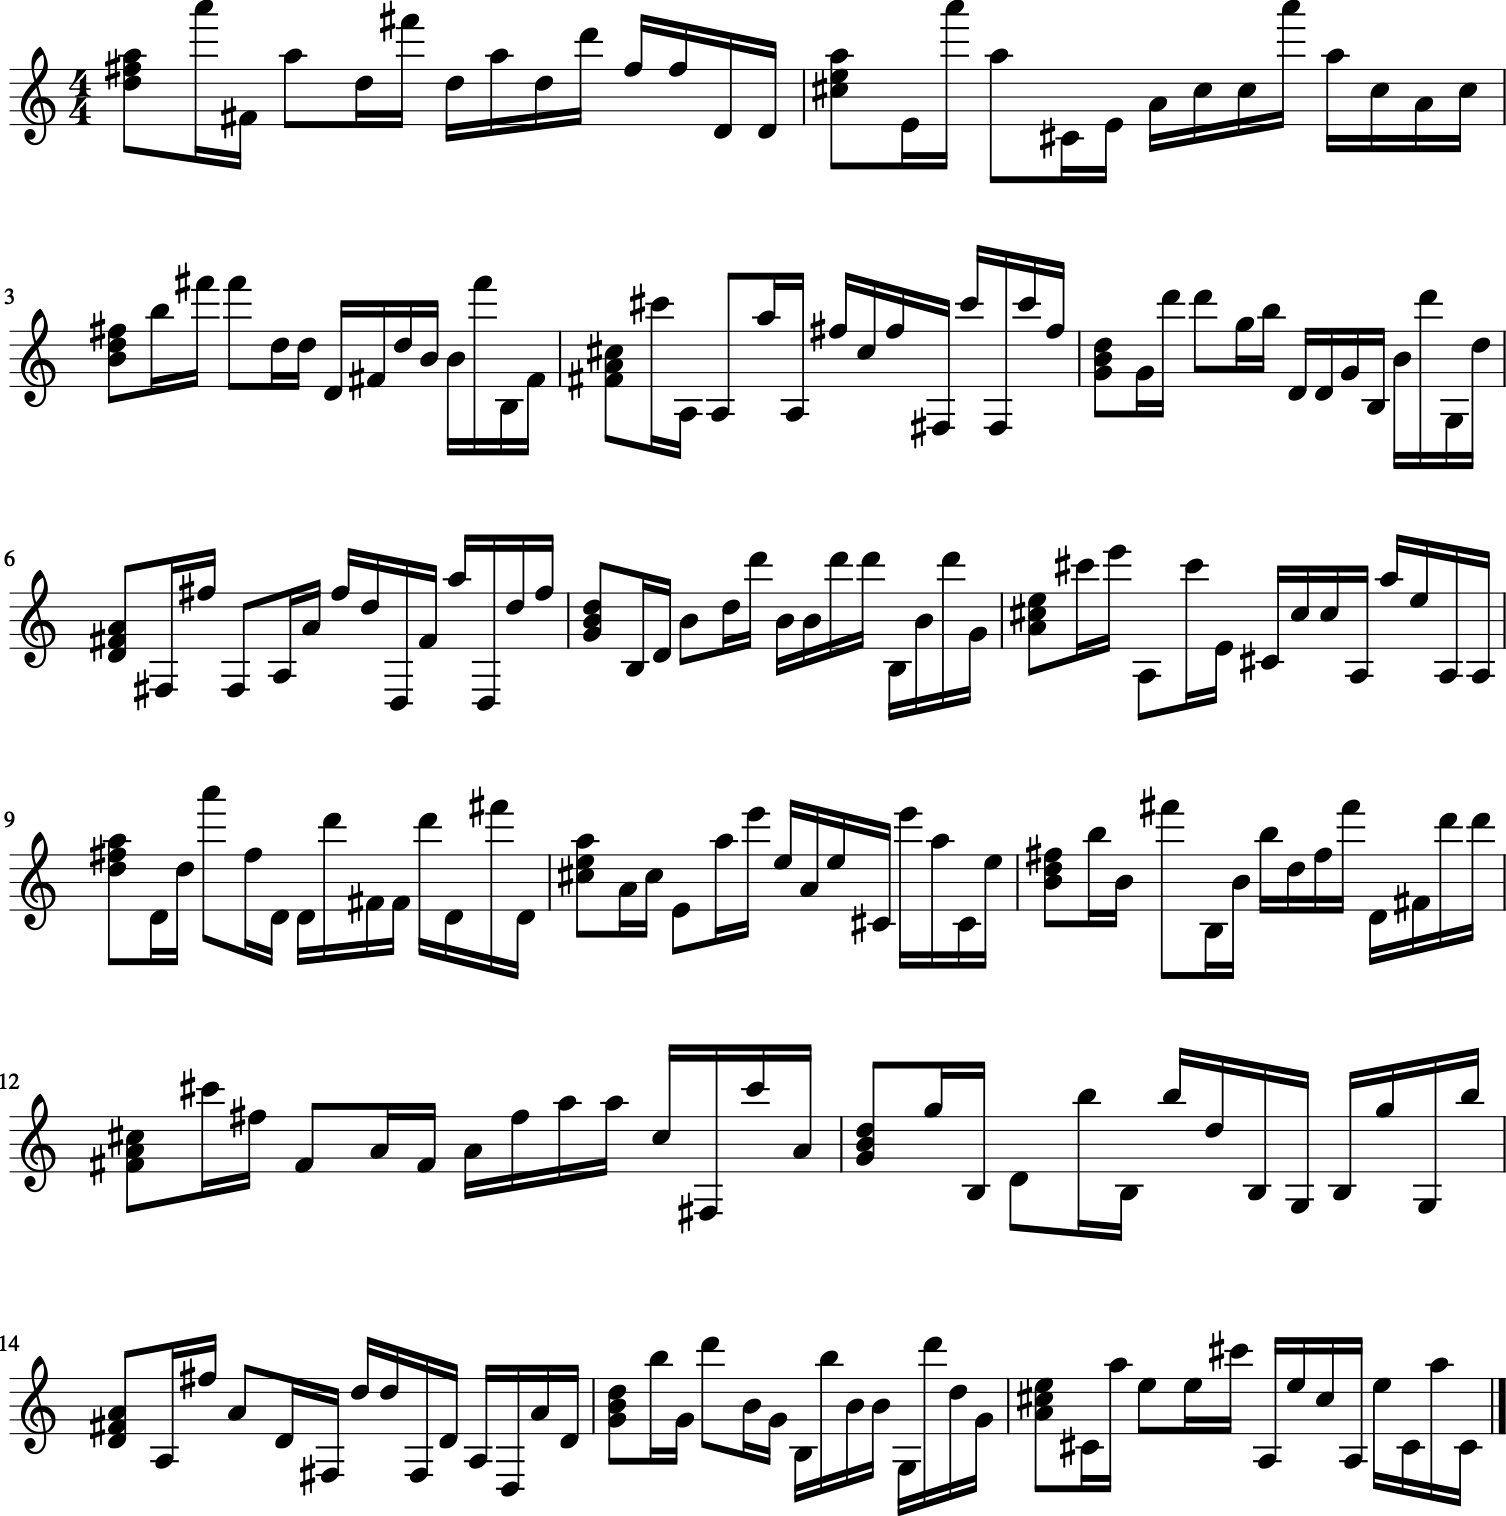

In [46]:
import guitarHarmony as gt
import numpy as np
elements  = []
# Hotel California
chord_set = ['B.m', 'F#.7', 'A.add9','E','G','D','E.m', 'F#.7']
inversion_set = '00010000'
bar_duration = np.array([0.5,0.25,0.25,0.25,0.5,0.25,1.0,0.5,0.5])
octaves = [0, 1]

# Canon
chord_set = ['D5', 'A', 'B.m','F#.m','G','D','G', 'A']
inversion_set = '01000000'
bar_duration = [0.5,0.25,0.25,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
octaves = [-1, 0, 1]

l = len(chord_set)
for idx in range(l*2):
    chord = gt.Chord.pharseChord(chord_set[idx%l], inversion=int(inversion_set[idx%l]), duration=bar_duration[0])
    ap = [random.choice(chord.chord_notes).setDuration(d).changeOctave(random.choice(octaves)) for d in bar_duration[1:]]
    elements.append([chord] + ap)
import random
s = gt.Stream([el for elset in elements for el in elset])
# s.show('notation')
s.show()
s.show('midi')